## Logisic Regression Code Implementation from Scratch

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Sigmoid Function

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### Loss Function

In [3]:
def log_loss(y, y_hat):
    return -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

#### Predict Fucntion

In [4]:
def predict(X, W):
    '''
    X : (n,d) it'a input matrix
    W : (d, 1) all the weights
    '''
    z = np.dot(X,W)
    return sigmoid(z)

#### Error Function

In [5]:
def error(X, y, W):

    y_hat = predict(X, W)
    
    err = np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
    
    return err

#### Gradient descent code

In [6]:
def gradient(X, y, W):
    y_hat = predict(X, W)
    grad = np.dot(X.T , y_hat - y )

    return grad/len(X)

In [7]:
def gradient_descent(X, Y, n_itr = 400, eta = 0.1):
    weights =  np.random.randn(X.shape[1],1)
    error_list = []

    for i in range(n_itr):
        e = error(X,Y, weights)
        error_list.append(e)
        grad = gradient(X, Y, weights)
        weights = weights - eta*grad

    return weights.round(2), error_list

#### Creating Dummy Data

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=14
                          )

In [10]:
X.shape, y.shape

((500, 2), (500,))

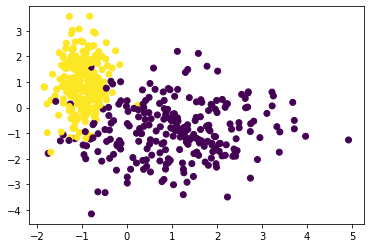

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [12]:
y  = y.reshape(-1, 1)
y.shape

(500, 1)

In [13]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))
X_new.shape

(500, 3)

In [14]:
X_new

array([[ 1.        , -0.89588599,  0.30746053],
       [ 1.        , -1.10138028,  0.95886945],
       [ 1.        ,  0.13024742, -1.94959026],
       ...,
       [ 1.        ,  2.32103424, -0.84023178],
       [ 1.        , -1.18055547,  1.17763449],
       [ 1.        , -0.55346507,  0.48572126]])

In [15]:
opt_weights, error_list = gradient_descent(X_new, y)

In [16]:
opt_weights.shape

(3, 1)

In [17]:
opt_weights

array([[-0.67],
       [-2.42],
       [ 1.52]])

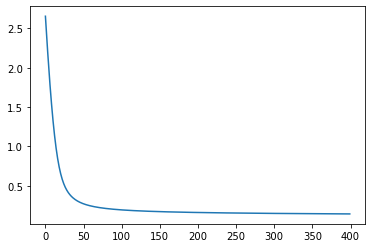

In [18]:
plt.plot(error_list)

### Predicting

In [19]:
y_hat = predict(X_new, opt_weights).round(2)

In [20]:
y_hat.shape

(500, 1)

In [21]:
y_hat[:5]

array([[0.88],
       [0.97],
       [0.02],
       [0.  ],
       [0.  ]])

In [22]:
y_pred = y_hat.round()

In [23]:
y_pred[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

### Visualise the best fit line

In [24]:
w0 , w1, w2  = opt_weights

In [25]:
x1 = np.array([-2,2])

x2 = -(w0 + w1*x1)/w2

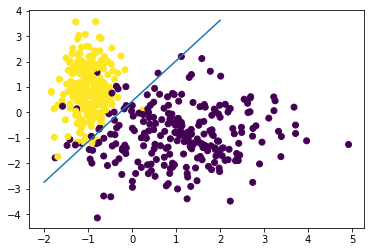

In [26]:
plt.plot(x1,x2)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

#### Performance of model

In [27]:
Accuracy = round((y_pred == y).sum()/len(y),2)

In [28]:
Accuracy

0.95

#### Logistic Regression - Code

It has one class with all the required functions

In [82]:
import pandas as pd
import numpy as np

## Logistic Regression: Linear Classifier model 
## .fit and .predict fucntion to be used

class LogisticRegression:

    def __init__(self,num_iters,alpha):
        self.num_iters = num_iters
        self.alpha = alpha
        

    def log_loss(self, y, y_hat):
        return -y*np.log(y_hat) - (1-y)*np.log(1-y_hat) 


    def fit(self,X,y):
        #Initialize some random weights to our coeeffcient
        self.weights = np.random.randn(X.shape[1])

        #compute the initial prediction
        y_hat = self.predict(X)

        #compute the initial loss
        current_loss = self.log_loss(y,y_hat)

        # print(self.weights)
        print(y_hat)
        print(current_loss)


        for steps in range(0,self.num_iters):
            
            # Compute the gradient
            dw = np.dot(X.T , y_hat - y )/len(X)
            
            #update the weights
            self.weights -= dw * self.alpha
            
            #re-compute the loss
            y_hat = self.predict(X)

            new_loss = self.log_loss(y,y_hat)
            print('new_loss: ',new_loss)

            # If current loss is greater than the new_loss we break else continue the iterartion.
            if current_loss > new_loss:
                pass
            
            #replace the current loss with new loss
            current_loss = new_loss


    def predict(self,X):

        #Write out the logistic Regression formula.
        value = np.dot(X,self.weights)

        return  1/(1+np.exp(-value))


        

In [84]:
X_train = np.array([[1,2],[3,4],[5,6]])
y_train = np.array([1,0,1])

X_test = np.array([[7,8],[9,10],[11,12]])
y_test = np.array([1,0,1])

model = LogisticRegression(num_iters= 100, alpha = 0.02)

model.fit(X_train,y_train)
model.predict(X)


[0.26625047 0.0328694  0.00317315]
[1.32331781 0.03342174 5.75303065]
new_loss:  [1.22606353 0.04518616 5.27499509]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()